# image reconstruction
The notebook is organized into the following sections:
1. [Helper Functions](#Helper-Functions)
2. [Image Creation](#Image-Creation )
3. [Ising Model](#Ising-Model)
4. [ICM](#ICM)
5. [Arg Max](#Arg-Max)
6. [Exemples](#Exemples)

In [36]:
import numpy as np
import matplotlib.pyplot as plt

## Helper Functions <a name="Helper-Functions"></a>

In [37]:
#Create a random matrix with a frame of 0 (natural number).
def CreateRandomMatrix():
    x = np.random.randint(low=0, high=2,size=(102,102))*2-1
    x[0] = x[0]*0
    x.T[0] = x.T[0]*0
    x.T[101] = x.T[101]*0
    x[101] = x[101]*0
    return x

#Create a random matrix to simulate random Gaussian noise.
def AddNoise(picture, axs):
    eta = 2*np.random.standard_normal((102,102))
    #Combine the matrix together to get a noisy picture.
    NoisyPic = picture + eta
    return NoisyPic

#Help function that calculates the Ising model fraction needed.
def CalculateFrac(sum, picture ,i ,j):
    frac1 = np.exp( sum - (1/8)*(picture[i,j]-1)**2)
    frac2 = np.exp(-sum - (1/8)*(picture[i,j]+1)**2)
    return frac1, frac2

## Image Creation <a name="Image-Creation"></a>

In this section, I've designed a function that uses the given temperature to create an image corresponding to the temperature level. A lower temperature results in fewer color changes, indicating fewer "random" pixels, while a higher temperature leads to more randomness in the picture.

In [38]:
#Create a random picture that fits the given temperature.
def CreatePicture(temp):
    pic = CreateRandomMatrix()
    for k in range(50):
        for i in range(1,101):
            for j in range(1,101):
                sum = (pic[i-1][j] + pic[i+1][j] + pic[i][j-1] + pic[i][j+1])/temp
                normalizer = np.exp(sum)+np.exp(-sum)
                theta = np.exp(sum)/normalizer
                pic[i][j] = int(np.random.rand()<theta)*2-1
    return pic

## Ising Model <a name="Ising-Model"></a>
Ising model calculates the sum of neighboring pixel values, evaluates the fractions representing 1 and -1 using the CalculateFrac function, and determines the pixel's color based on the higher fraction. This probabilistic approach incorporates randomness in the selection of pixel colors, ultimately generating an image with characteristics shaped by the Ising model.

In [39]:
#Using the Ising model to create a possible picture from the posterior (noisy picture).
def IsingModel(picture, temp, axs):
    #Create a random matrix that the ising model will work on.
    ReconIsing = CreateRandomMatrix()
    for k in range(50):
        for i in range(1,101):
            for j in range(1,101):
                sum = (ReconIsing[i-1][j] + ReconIsing[i+1][j] + ReconIsing[i][j-1] + ReconIsing[i][j+1])/temp
                frac1 ,frac2 = CalculateFrac(sum,picture,i,j)
                normalizer = frac1+frac2
                #Calculating the relative proportion between the colors.
                theta = frac1/normalizer
                #For each pixel, calculate the probability of it being white or black.
                ReconIsing[i][j] = int(np.random.rand()<theta)*2-1
    return ReconIsing

## ICM <a name="ICM"></a>
The ICM utilizes a similar logic to the Ising model. Instead of introducing randomness during the color selection, we examine the fractions representing 1 and -1 for each pixel. The pixel's value is then determined by selecting the higher fraction, whether it corresponds to 1 or -1.

In [40]:
#Iterated Conditional Modes
def ICM_Reconstruct(picture, temp, axs):
    ICM = CreateRandomMatrix()
    for k in range(30):
        for i in range(1,101):
            for j in range(1,101):
                sum=(ICM[i-1][j] + ICM[i+1][j] + ICM[i][j-1] + ICM[i][j+1])/temp
                frac1 , frac2 = CalculateFrac(sum,picture,i,j)
                #Same as the Ising model just not using the random factor, using max instad.
                ICM[i][j] = int(frac1>frac2)*2-1
    return ICM

## Arg Max <a name="Arg-Max"></a>
In this method, we examine each pixel individually. Given that the original pixels were set to -1 and 1, we evaluate the value of each pixel. If it is positive we set it to 1, otherwise it is negative we set it to -1.

In [41]:
#Sign checking, meaning determining the closest color and selecting it.
def ArgMax_Reconstruct(picture, axs):
    sign = np.zeros((102,102))
    sign[picture > 0] = 1
    sign[sign != 1] = -1
    return sign

## Exemples <a name="Exemples"></a>

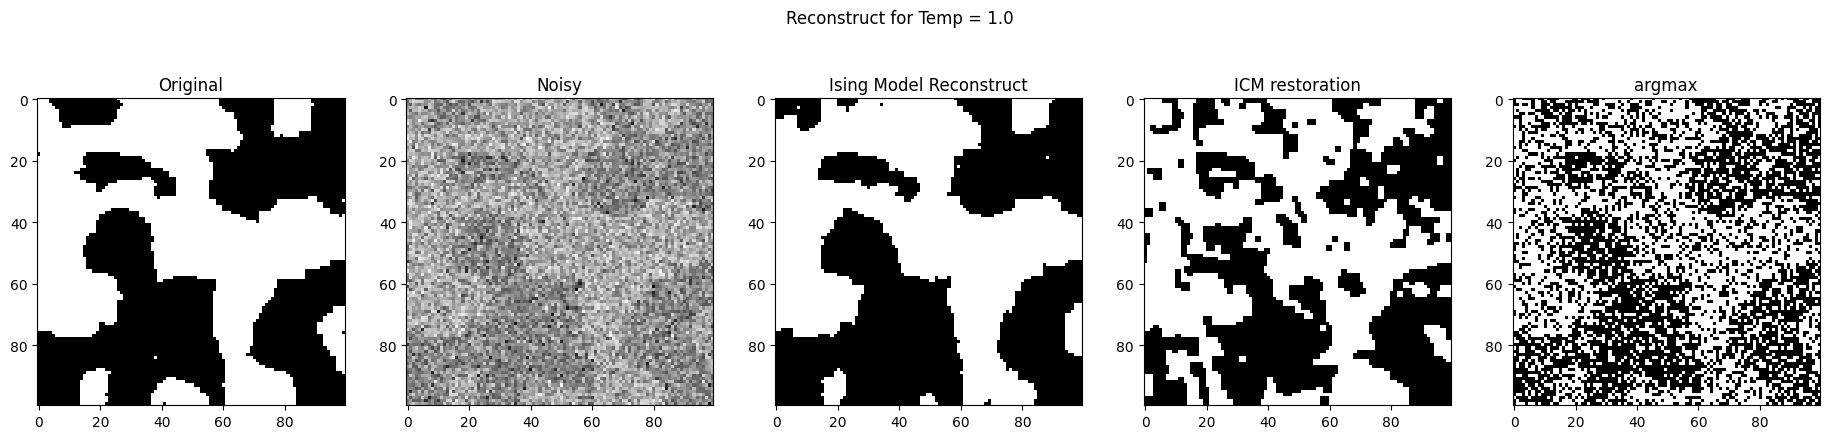

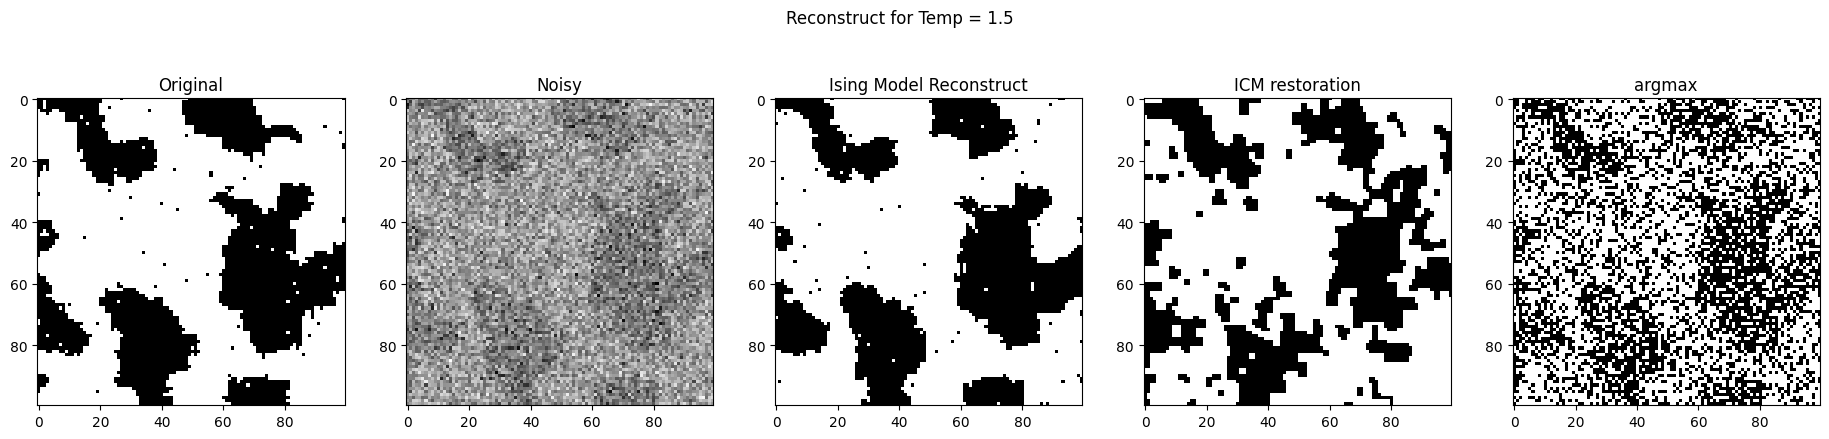

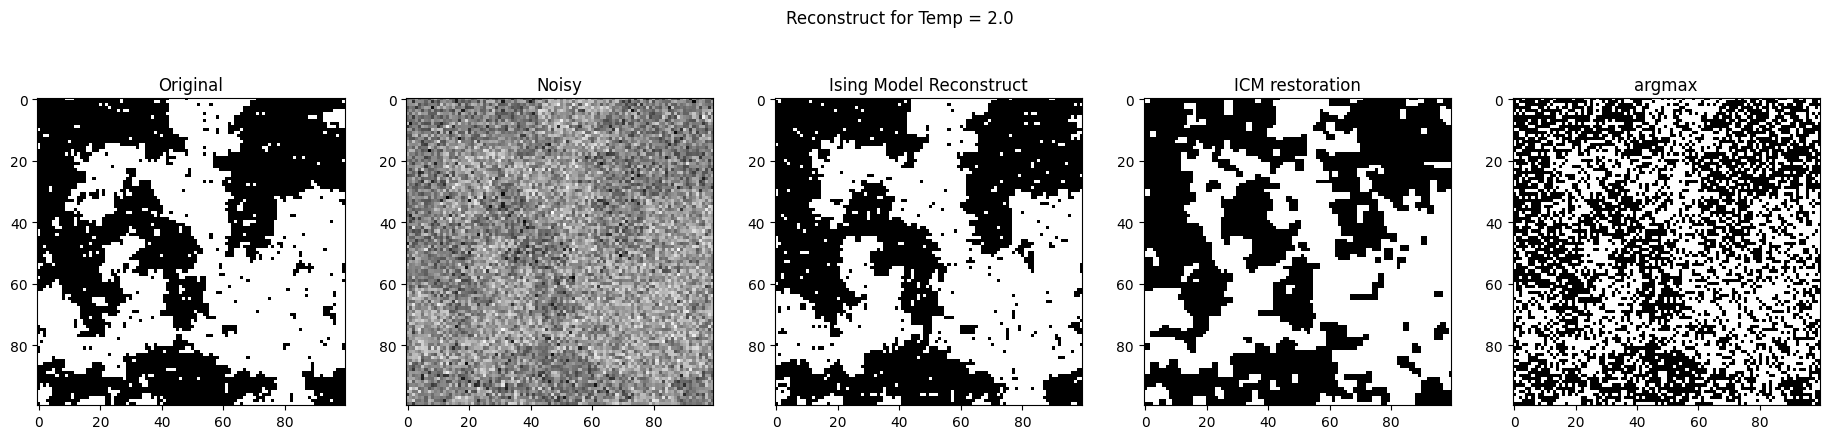

In [42]:
temps = np.array([1,1.5,2])
#Run all models and see how they work with different temperatures.
for temp in temps:
    fig, axs = plt.subplots(1,5)
    fig.suptitle('Reconstruct for Temp = '+ str(temp))
    #
    pic = CreatePicture(temp)
    axs[0].imshow(pic[1:101,1:101], vmin=-1,cmap="Greys", vmax=+1 , interpolation="None")
    axs[0].set_title('Original')
    #
    NoisyPic = AddNoise(pic, axs)
    axs[1].imshow(NoisyPic[1:101,1:101], cmap="Greys" , interpolation="None")
    axs[1].set_title('Noisy')
    #
    ReconIsing = IsingModel(NoisyPic, temp, axs)
    axs[2].imshow(ReconIsing[1:101,1:101], vmin=-1,cmap="Greys", vmax=+1 , interpolation="None")
    axs[2].set_title('Ising Model Reconstruct')
    #
    ICM = ICM_Reconstruct(NoisyPic, temp, axs)
    axs[3].imshow(ICM[1:101,1:101], vmin=-1,cmap="Greys", vmax=+1 , interpolation="None")
    axs[3].set_title('ICM restoration')
    #
    arg = ArgMax_Reconstruct(NoisyPic, axs)
    axs[4].imshow(arg[1:101,1:101], vmin=-1,cmap="Greys", vmax=+1 , interpolation="None")
    axs[4].set_title('argmax')

    fig.set_size_inches(23, 5)
    plt.show()